In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Automatically created module for IPython interactive environment


In [62]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X) * 10

# np.random.seed(0)

n_samples = 10
degrees = [1, 2, 3, 4, 5, 10]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 1.5

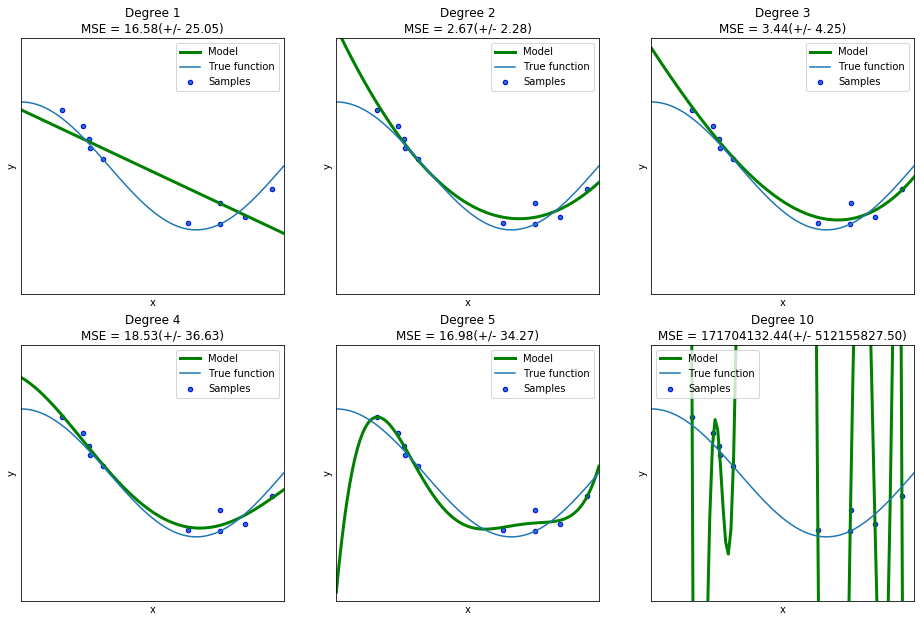

In [63]:
plt.figure(figsize=(16, 16))
for i in range(len(degrees)):
    col_num = (i) % 3
    row_num = int((i - (i) % 3)/3)
    ax = plt.subplot2grid((3, 3), (row_num, col_num))
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model", color='g', linewidth=3.0)
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-20, 20))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2f}(+/- {:.2f})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()